In [86]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, radviz

In [2]:
Path.cwd()

PosixPath('/home/mrosinski/git/python-data-visualization/code/clean')

In [3]:
src_file = Path.home() / 'git' / 'python-data-visualization' / 'code' / 'data' / 'raw' / 'EPA_fuel_economy.csv'
img_dir = Path.home() / 'git' / 'python-data-visualization' / 'code' / 'images'

In [4]:
src_file

PosixPath('/home/mrosinski/git/python-data-visualization/code/data/raw/EPA_fuel_economy.csv')

In [5]:
df = pd.read_csv(src_file)

In [6]:
df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


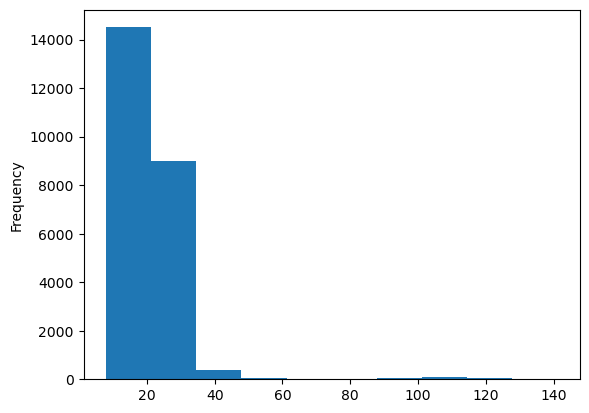

In [7]:
df['comb08'].plot.hist();

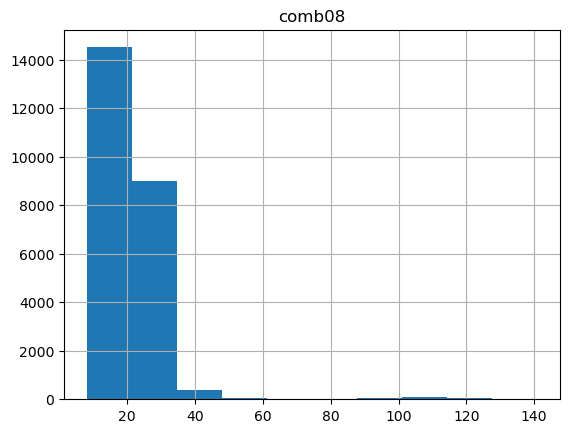

In [8]:
df.hist(column = ['comb08']);

<AxesSubplot: ylabel='Frequency'>

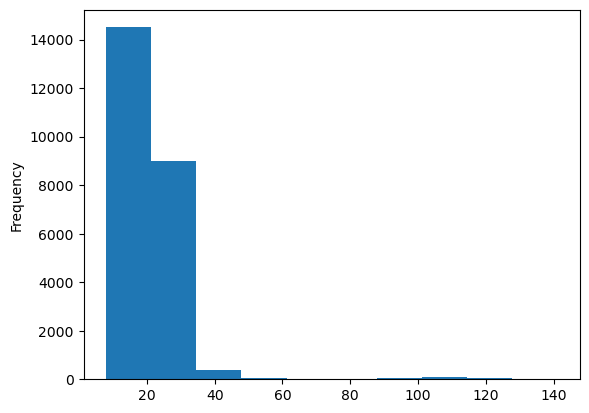

In [9]:
df['comb08'].plot(kind = 'hist')

<AxesSubplot: >

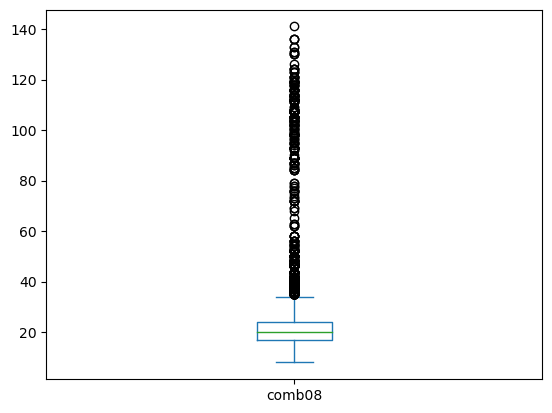

In [10]:
df['comb08'].plot(kind = 'box')

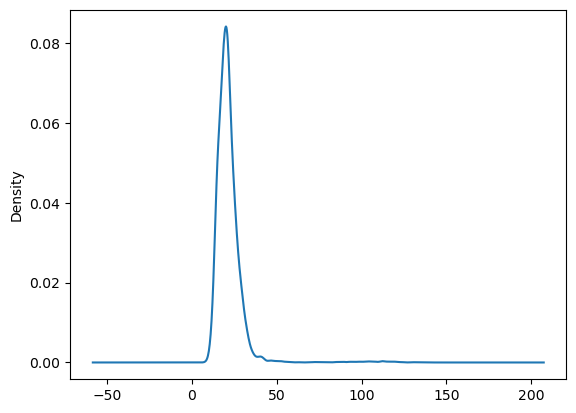

In [28]:
df['comb08'].plot(kind = 'kde')

In [12]:
avg_by_year = df.groupby(['year']).agg({'highway08':'mean', 
                                        'city08':'mean',
                                        'comb08':'mean'})
avg_by_year

,highway08,city08,comb08
year,,,
2000,23.414286,17.221429,19.526190
2001,23.328211,17.275521,19.479693
2002,23.030769,16.893333,19.168205
2003,22.836207,16.780651,19.000958
2004,23.064171,16.740642,19.067736
2005,23.297599,16.851630,19.193825
2006,23.048913,16.626812,18.959239
2007,23.083481,16.605684,18.978686
2008,23.455771,16.900590,19.276327


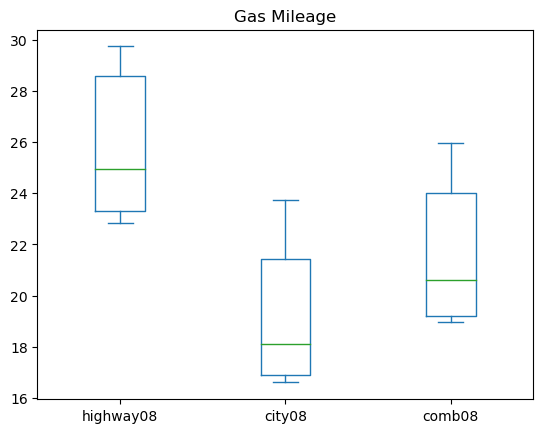

In [13]:
avg_by_year.plot(kind = 'box', title = 'Gas Mileage');

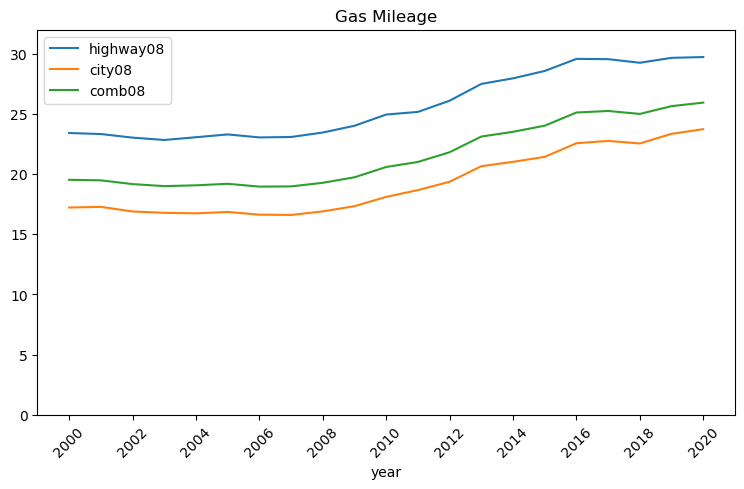

In [14]:
avg_by_year.plot(kind = 'line', title = 'Gas Mileage', figsize = (9, 5),
                 xticks = np.arange(2000, 2022, 2), ylim = (0, 32), 
                 rot = 45);

<AxesSubplot: xlabel='year'>

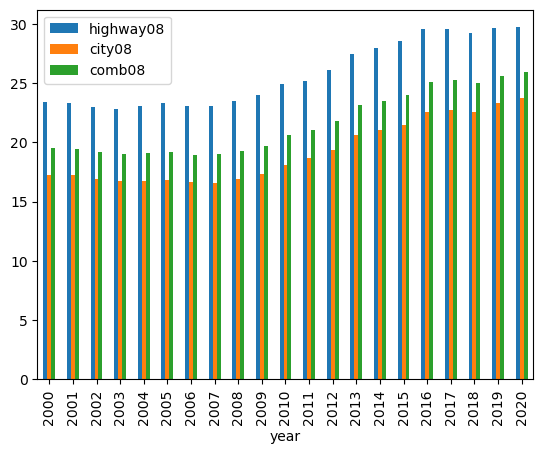

In [15]:
avg_by_year.plot(kind = 'bar')

<AxesSubplot: xlabel='year'>

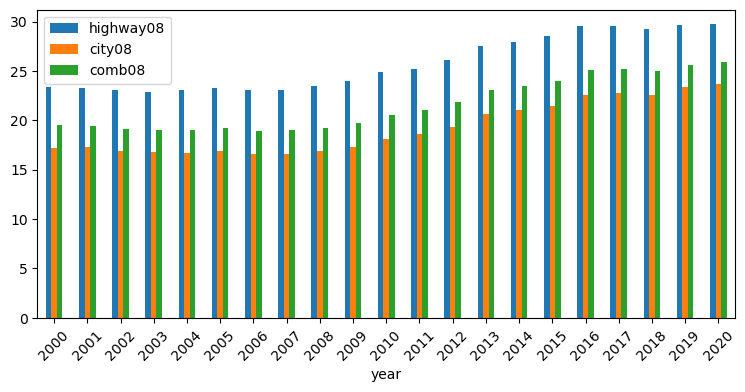

In [17]:
avg_by_year.plot(kind = 'bar', rot = 45, figsize = (9, 4))

<AxesSubplot: ylabel='year'>

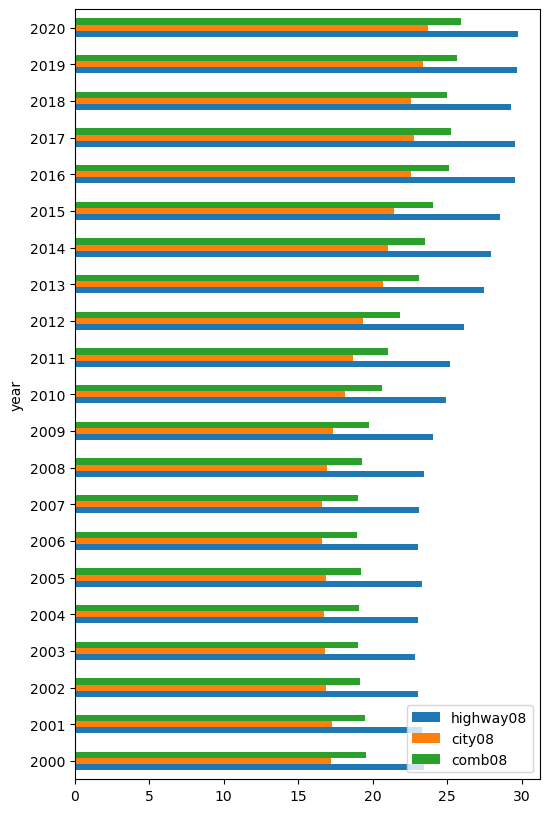

In [20]:
avg_by_year.plot(kind = 'barh', figsize = (6, 10))

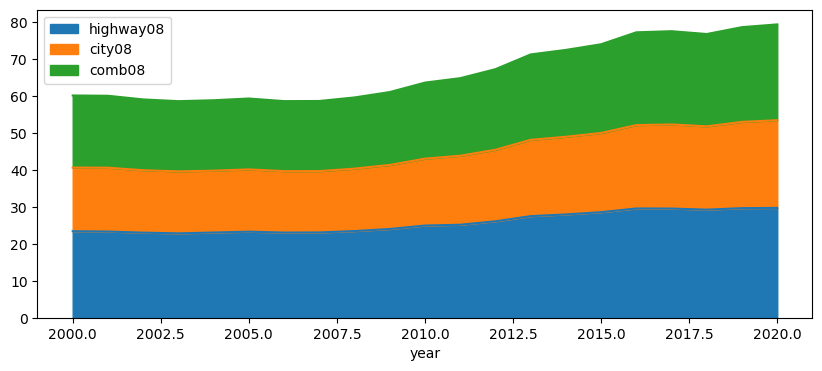

In [22]:
avg_by_year.plot(kind = 'area', figsize = (10, 4));

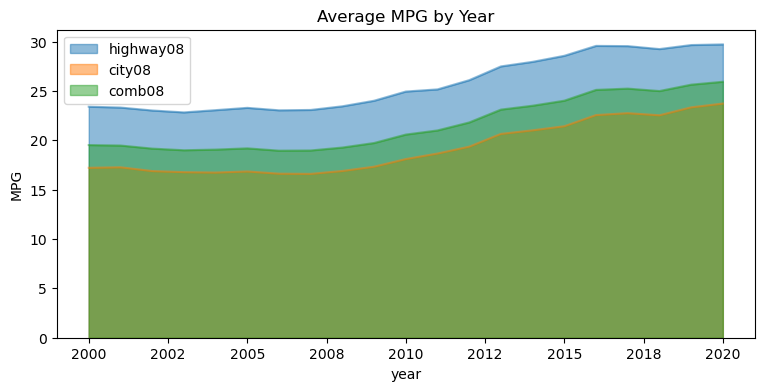

In [27]:
fig, ax1 = plt.subplots(figsize = (9, 4))
avg_by_year.plot(kind = 'area', ax = ax1, stacked = False)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
ax1.set(ylabel = 'MPG', title = 'Average MPG by Year');

# Panel histograms and boxplots

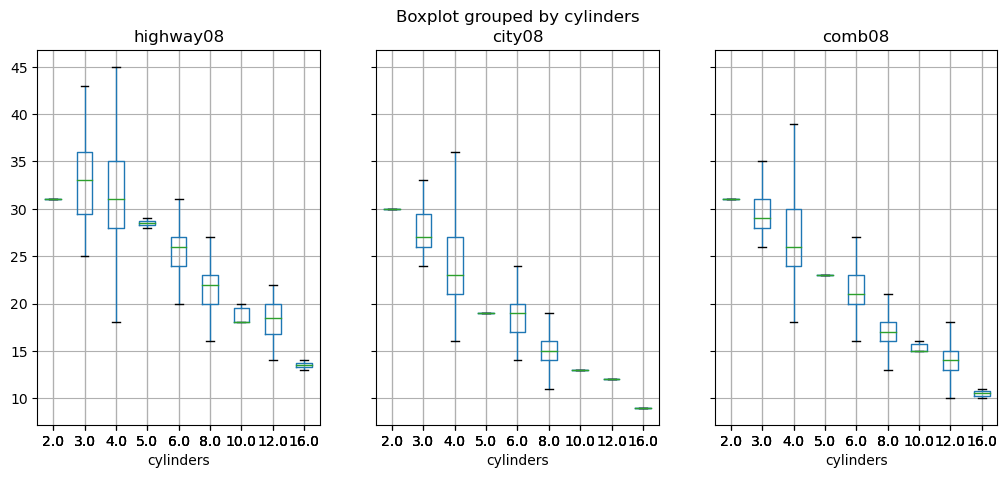

In [38]:
(df
    .query('year >= 2020 & highway08 < 60')
    .boxplot(column = ['highway08', 'city08', 'comb08'],
             by = 'cylinders', figsize = (12,5), layout = (1,3),
             showfliers = False)
);

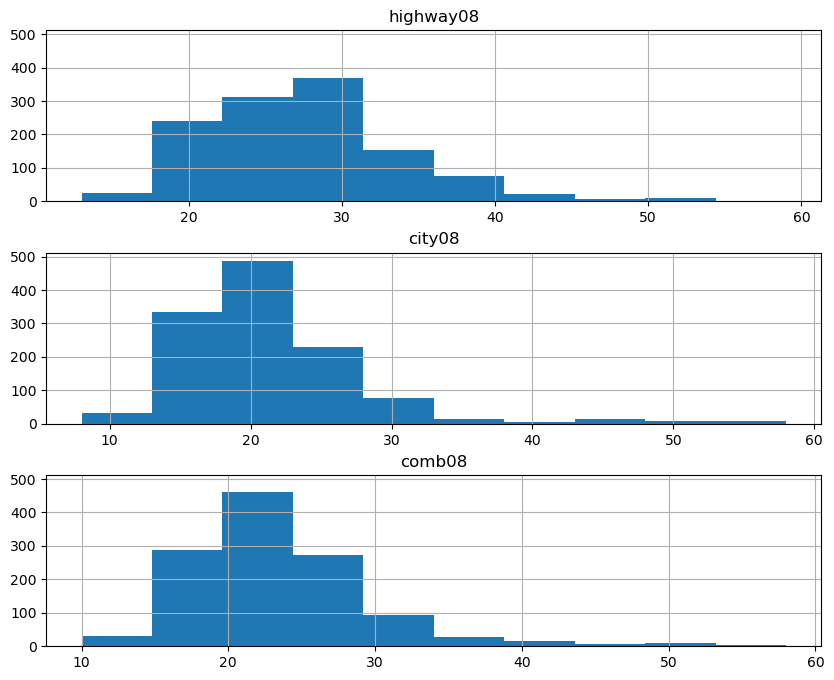

In [39]:
(df
    .query('year >= 2020 & highway08 < 60')
    .hist(column = ['highway08', 'city08', 'comb08'],
            figsize = (10,8), sharey = True,
            layout = (3,1))
);

# Scatter Matrix

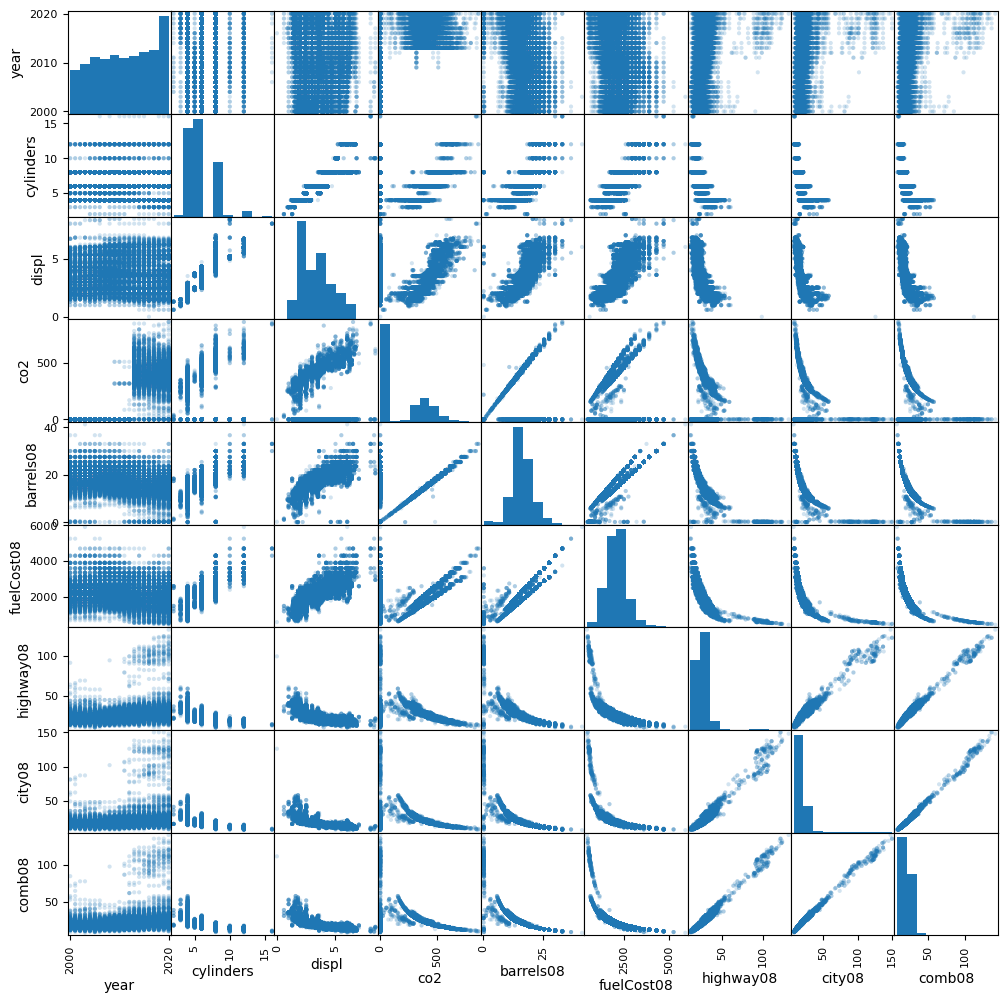

In [42]:
scatter_matrix(df, alpha = 0.2, figsize = (12,12));

In [47]:
counts = df['VClass'].value_counts()
counts

Compact Cars                          3408
Midsize Cars                          3191
Subcompact Cars                       2182
Sport Utility Vehicle - 4WD           1987
Large Cars                            1692
Sport Utility Vehicle - 2WD           1556
Two Seaters                           1504
Minicompact Cars                      1056
Standard Pickup Trucks 2WD            1020
Small Sport Utility Vehicle 4WD        977
Small Station Wagons                   950
Standard Pickup Trucks 4WD             922
Standard Sport Utility Vehicle 4WD     776
Small Sport Utility Vehicle 2WD        664
Midsize Station Wagons                 400
Minivan - 2WD                          340
Small Pickup Trucks 2WD                314
Vans, Cargo Type                       312
Standard Sport Utility Vehicle 2WD     294
Vans, Passenger Type                   224
Small Pickup Trucks 4WD                207
Special Purpose Vehicle 2WD            149
Minivan - 4WD                           48
Special Pur

In [74]:
car_class = counts.index.tolist()[0:6]

In [75]:
car_class

['Compact Cars',
 'Midsize Cars',
 'Subcompact Cars',
 'Sport Utility Vehicle - 4WD',
 'Large Cars',
 'Sport Utility Vehicle - 2WD']

In [87]:
# car_class = ['Compact Cars', 'Midsize Cars', 'Subcompact Cars', 'Large Cars', 'Sport Utility Vehicle - 4WD', 'Sport Utility Vehicle - 2WD']
car_class_df = df[['cylinders', 'fuelCost08', 'co2', 'VClass', 'displ']].query('VClass == @car_class').copy()

In [88]:
car_class_df

,cylinders,fuelCost08,co2,VClass,displ
51,4.0,1650,-1,Subcompact Cars,1.8
52,4.0,1550,-1,Subcompact Cars,1.8
53,4.0,1950,-1,Subcompact Cars,1.8
54,8.0,3900,-1,Subcompact Cars,6.7
55,8.0,3900,-1,Subcompact Cars,6.7
...,...,...,...,...,...
24142,2.0,1500,22,Subcompact Cars,0.6
24145,8.0,3900,749,Midsize Cars,6.8
24148,NaN,950,0,Large Cars,NaN
24155,4.0,2050,382,Compact Cars,2.0


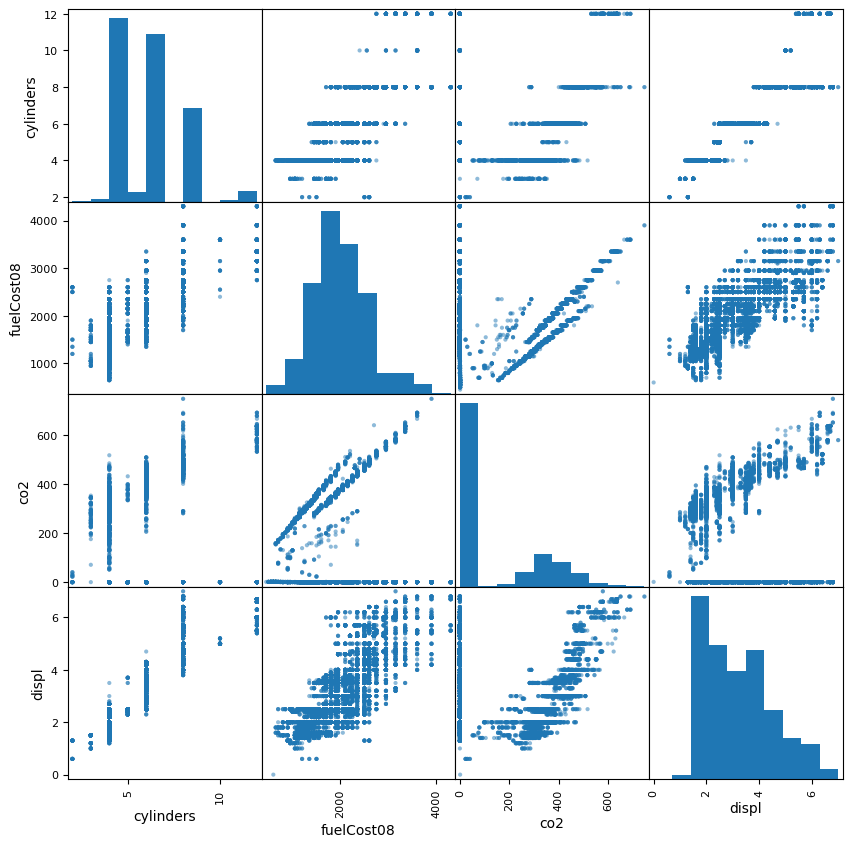

In [89]:
scatter_matrix(car_class_df, figsize=(10,10), );

# Andrews Curves

## Visualise high dimensional data

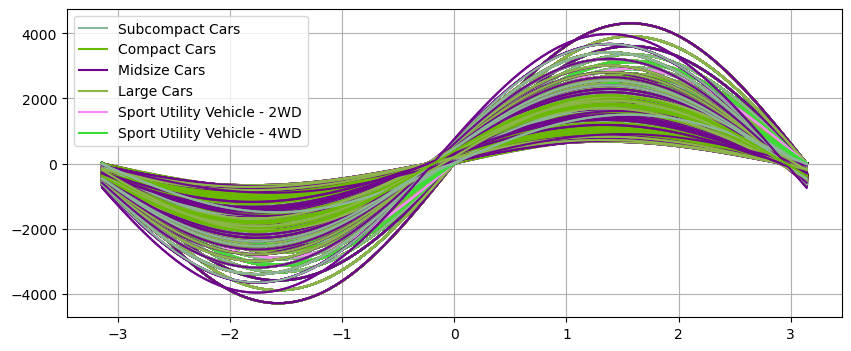

In [81]:
fig, ax1 = plt.subplots(figsize=(10,4))
andrews_curves(car_class_df, 'VClass', ax = ax1)
ax1.legend(loc='upper left');

## Parallel coordinates

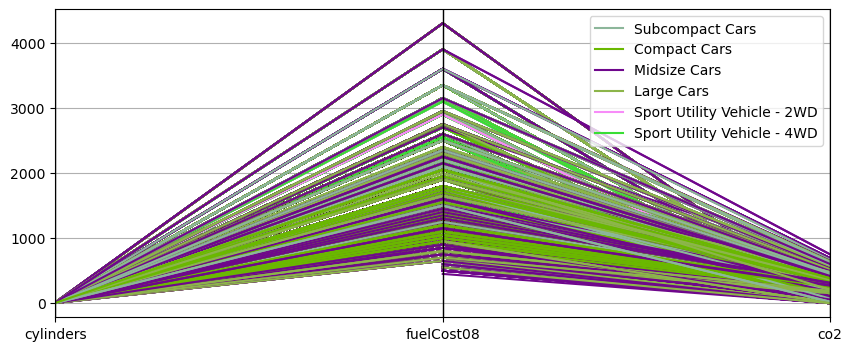

In [84]:
fig, ax1 = plt.subplots(figsize=(10,4))
parallel_coordinates(car_class_df, 'VClass', ax=ax1);

## Radial Visualisation

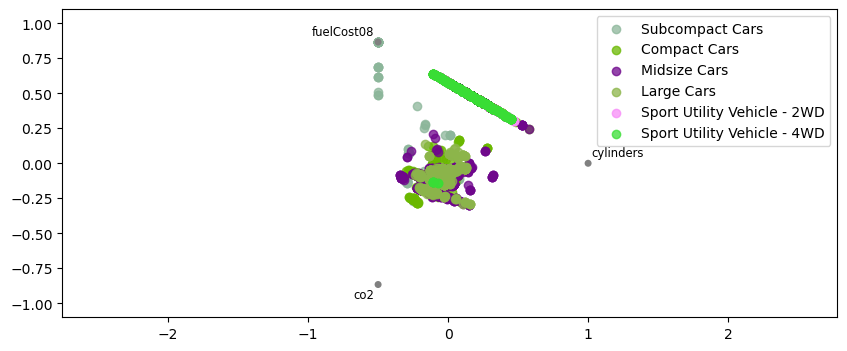

In [83]:
fig, ax1 = plt.subplots(figsize=(10,4))
radviz(car_class_df, 'VClass', ax=ax1, alpha=0.75);

## Combined complex plots

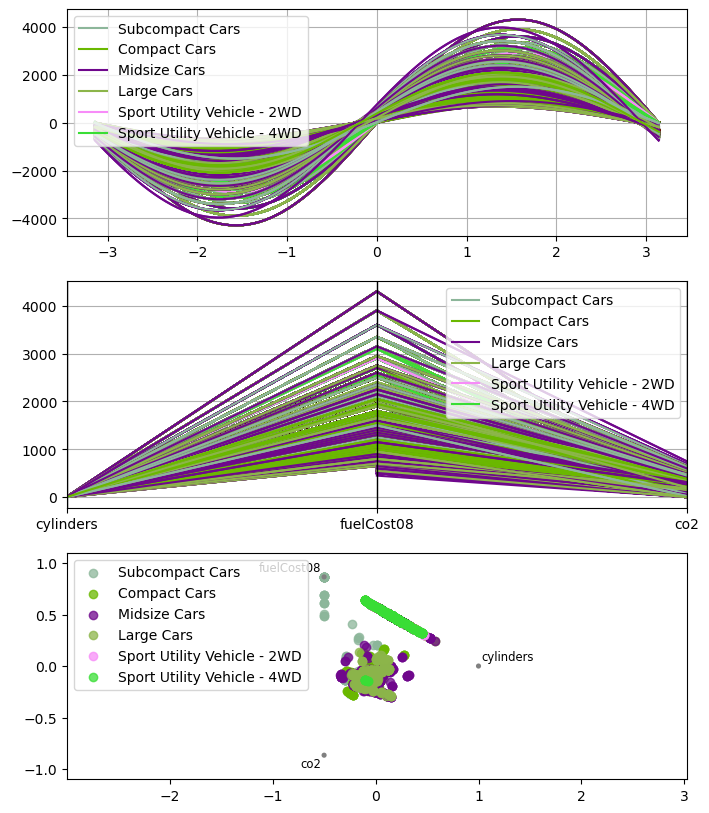

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(8,10), nrows = 3, ncols = 1)
andrews_curves(car_class_df, 'VClass', ax = ax1)
ax1.legend(loc = 'upper left')
parallel_coordinates(car_class_df, 'VClass', ax=ax2)
radviz(car_class_df, 'VClass', ax=ax3, alpha=0.75);